# 시작

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torchvision
from torchvision import datasets
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.transforms as transforms
import numpy as np
import seaborn as sns
%matplotlib inline
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
from tqdm import tqdm

from torchsummary import summary
from torch.optim import lr_scheduler
import copy
import time
from PIL import Image
import torch.nn.functional as F
import torch.nn as nn

import torchvision
import torchvision.transforms as T
from torchvision.utils import make_grid

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', 20)

In [2]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import glob
import shutil
from PIL import Image

# Real, Fake 사진 Train, Valid, Test 분류

In [ ]:
### fake 이미지 분류

fake_photo_list = []
for f in os.listdir('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake'):
    if 'jpg' in f:
        fake_photo_list.append(f)

easy_list=[]
for j in fake_photo_list:
    if 'easy' in j:
        easy_list.append(j)

mid_list=[]
for j in fake_photo_list:
    if 'mid' in j:
        mid_list.append(j)

hard_list=[]
for j in fake_photo_list:
    if 'hard' in j:
        hard_list.append(j)


print(len(easy_list), len(mid_list), len(hard_list))




240 480 240


In [ ]:
# In[47]:


easy_train_set, easy_test_set = train_test_split(easy_list, test_size=(1/8), random_state=42)


# In[48]:


easy_train_set, easy_valid_set = train_test_split(easy_train_set, test_size=(1/7), random_state=42)


# In[51]:


for i in easy_train_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Train/fake')

for i in easy_valid_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Valid/fake')

for i in easy_test_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Test/fake')


# In[52]:


### mid fake이미지들 폴더이동

mid_train_set, mid_test_set = train_test_split(mid_list, test_size=(1/8), random_state=42)
mid_train_set, mid_valid_set = train_test_split(mid_train_set, test_size=(1/7), random_state=42)

for i in mid_train_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Train/fake')

for i in mid_valid_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Valid/fake')

for i in mid_test_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Test/fake')


# In[53]:


### hard fake이미지들 폴더이동

hard_train_set, hard_test_set = train_test_split(hard_list, test_size=(1/8), random_state=42)
hard_train_set, hard_valid_set = train_test_split(hard_train_set, test_size=(1/7), random_state=42)

for i in hard_train_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Train/fake')

for i in hard_valid_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Valid/fake')

for i in hard_test_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_fake/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Test/fake')

In [ ]:

from sklearn.model_selection import train_test_split
import os,sys
real_list = []
for f in os.listdir('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_real'):
    if 'jpg' in f:
        real_list.append(f)

real_train_set, real_test_set = train_test_split(real_list, test_size=0.125, random_state=42)
real_train_set, real_valid_set = train_test_split(real_train_set, test_size=(1/7), random_state=42)

print(len(real_train_set),len(real_valid_set),len(real_test_set))

810 135 136


In [ ]:
for i in real_train_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_real/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Train/real')

for i in real_valid_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_real/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Valid/real')

for i in real_test_set:
    shutil.move('/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/training_real/'+i, '/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/Test/real')


# Data loading with Augmentation

In [7]:
import os,sys
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.Resize((256,256)),
        transforms.FiveCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ]),
    'valid': transforms.Compose([
        #transforms.RandomHorizontalFlip(),
        transforms.Resize((256,256)),
        transforms.TenCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ]),
    'test': transforms.Compose([
        transforms.Resize((256,256)),
        transforms.TenCrop(224),
        #transforms.CenterCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ])
}
PATH='/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/'
data_dir = PATH
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x]) for x in ['train', 'valid','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True) for x in ['train', 'valid','test']}
#dataloader를 사전식으로 저장해놓은거                                             
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
class_count=[image_datasets['train'],image_datasets['valid'],image_datasets['test']]
class_names = image_datasets['train'].classes
print(class_names) #fake=0, real=1


['fake', 'real']


# 이미지 확인

In [5]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(10,10))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


In [9]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(inputs.shape)
inputs_reshape=inputs.view(-1,3,224,224)
# Make a grid from batch
#out = torchvision.utils.make_grid(inputs,nrow=4)

#imshow(out, title=[class_names[x] for x in classes])
for image in inputs_reshape:
  imshow(image)

Output hidden; open in https://colab.research.google.com to view.

# Modeling

## 1차 실험

In [10]:
import torchvision.models as models
def train_model(model, criterion, optimizer, scheduler, num_epochs=1):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_acc=[]
    valid_acc=[]
    loss_list=[]
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validationidation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evalidationuate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                
                # zero the parameter gradients
                optimizer.zero_grad()
                bs, ncrops, c, h, w = inputs.size()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs.view(-1, c, h, w))
                    outputs_avg = outputs.view(bs, ncrops, -1).mean(1)
                    _, preds = torch.max(outputs_avg, 1)
                    loss = criterion(outputs_avg, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            if phase =='train':
              scheduler.step(epoch_loss)

            if phase=='train':
              train_acc.append(epoch_acc)
            if phase == 'valid':
              valid_acc.append(epoch_acc)
              loss_list.append(epoch_loss)
            print(f'{phase} Loss: {epoch_loss:.5f} Acc: {epoch_acc:.5f}')
            
            if phase=='valid':
              print(f'''last learning rate:{exp_lr_scheduler.state_dict()['_last_lr']}''')
            
            

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best validation Acc: {:4f}'.format(best_acc))
 
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model,train_acc,valid_acc,loss_list

#### (1) ResNet18 Pretrained

In [ ]:
model_ft = models.resnet18(pretrained=True)
model_ft.state_dict

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 1/15
----------
train Loss: 0.7697 Acc: 0.5490
valid Loss: 0.6313 Acc: 0.6824

Epoch 2/15
----------
train Loss: 0.6007 Acc: 0.6902
valid Loss: 0.5915 Acc: 0.6745

Epoch 3/15
----------
train Loss: 0.5424 Acc: 0.7346
valid Loss: 0.6867 Acc: 0.6314

Epoch 4/15
----------
train Loss: 0.5509 Acc: 0.7209
valid Loss: 0.6442 Acc: 0.6863

Epoch 5/15
----------
train Loss: 0.5090 Acc: 0.7542
valid Loss: 0.7529 Acc: 0.6353

Epoch 6/15
----------
train Loss: 0.4731 Acc: 0.7784
valid Loss: 0.6788 Acc: 0.6549

Epoch 7/15
----------
train Loss: 0.4505 Acc: 0.7902
valid Loss: 0.6277 Acc: 0.7137

Epoch 8/15
----------
train Loss: 0.3702 Acc: 0.8340
valid Loss: 0.6449 Acc: 0.7294

Epoch 9/15
----------
train Loss: 0.3240 Acc: 0.8569
valid Loss: 0.6177 Acc: 0.7137

Epoch 10/15
----------
train Loss: 0.3028 Acc: 0.8654
valid Loss: 0.6398 Acc: 0.7333

Epoch 11/15
----------
train Loss: 0.2974 Acc: 0.8725
valid Loss: 0.6182 Acc: 0.7020

Epoch 12/15
----------
train Loss: 0.2957 Acc: 0.8758
valid Los

#### (2) ResNet18 FC 변경

In [ ]:
from collections import OrderedDict
#num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Sequential(OrderedDict([
            ('Linear1',torch.nn.Linear(512, 2, bias=True)),
            ('Dropout1',torch.nn.Dropout(0.5,inplace=False)),
            ('ReLU1',torch.nn.ReLU()),
            ('result',torch.nn.Softmax())]))
print(model_ft.state_dict)
model_ft = model_ft.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 1/15
----------


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train Loss: 0.6349 Acc: 0.5869
valid Loss: 0.6043 Acc: 0.6980

Epoch 2/15
----------
train Loss: 0.5986 Acc: 0.6346
valid Loss: 0.5854 Acc: 0.7373

Epoch 3/15
----------
train Loss: 0.5921 Acc: 0.6490
valid Loss: 0.5810 Acc: 0.7490

Epoch 4/15
----------
train Loss: 0.5849 Acc: 0.6490
valid Loss: 0.5958 Acc: 0.7137

Epoch 5/15
----------
train Loss: 0.5872 Acc: 0.6425
valid Loss: 0.5876 Acc: 0.7137

Epoch 6/15
----------
train Loss: 0.5801 Acc: 0.6641
valid Loss: 0.5865 Acc: 0.7059

Epoch 7/15
----------
train Loss: 0.5778 Acc: 0.6523
valid Loss: 0.6007 Acc: 0.6980

Epoch 8/15
----------
train Loss: 0.5618 Acc: 0.6856
valid Loss: 0.5902 Acc: 0.7020

Epoch 9/15
----------
train Loss: 0.5674 Acc: 0.6739
valid Loss: 0.5758 Acc: 0.7373

Epoch 10/15
----------
train Loss: 0.5633 Acc: 0.6778
valid Loss: 0.5721 Acc: 0.7529

Epoch 11/15
----------
train Loss: 0.5643 Acc: 0.6667
valid Loss: 0.5734 Acc: 0.7294

Epoch 12/15
----------
train Loss: 0.5603 Acc: 0.6719
valid Loss: 0.5768 Acc: 0.7451


#### (3) ResNet18(기본) Weight Decay

In [ ]:
model_ft = models.resnet18(pretrained=True)
model_ft.state_dict

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 1/15
----------
train Loss: 0.6855 Acc: 0.5967
valid Loss: 0.6836 Acc: 0.6078

Epoch 2/15
----------
train Loss: 0.6047 Acc: 0.6647
valid Loss: 0.6028 Acc: 0.6667

Epoch 3/15
----------
train Loss: 0.5698 Acc: 0.7098
valid Loss: 0.6511 Acc: 0.6549

Epoch 4/15
----------
train Loss: 0.5364 Acc: 0.7346
valid Loss: 0.5670 Acc: 0.6980

Epoch 5/15
----------
train Loss: 0.5037 Acc: 0.7601
valid Loss: 0.5895 Acc: 0.6941

Epoch 6/15
----------
train Loss: 0.4845 Acc: 0.7752
valid Loss: 0.6261 Acc: 0.6902

Epoch 7/15
----------
train Loss: 0.4768 Acc: 0.7673
valid Loss: 0.6619 Acc: 0.6824

Epoch 8/15
----------
train Loss: 0.3586 Acc: 0.8490
valid Loss: 0.5826 Acc: 0.7255

Epoch 9/15
----------
train Loss: 0.3239 Acc: 0.8667
valid Loss: 0.5815 Acc: 0.7176

Epoch 10/15
----------
train Loss: 0.2910 Acc: 0.8935
valid Loss: 0.5385 Acc: 0.7569

Epoch 11/15
----------
train Loss: 0.2956 Acc: 0.8771
valid Loss: 0.5324 Acc: 0.7529

Epoch 12/15
----------
train Loss: 0.2967 Acc: 0.8863
valid Los

#### (4) VGGNet16 Pretrained


In [ ]:
vgg = models.vgg16(pretrained=T)
vgg.state_dict

<bound method Module.state_dict of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [ ]:
#params 조정
vgg.classifier=torch.nn.Sequential(
    torch.nn.Linear(in_features=25088, out_features=4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=4096, out_features=4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=4096, out_features=2, bias=True)
  )


In [ ]:
print(vgg.state_dict)
vgg=vgg.to(device)
criterion = torch.nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(vgg.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 5 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

model_ft = train_model(vgg, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

<bound method Module.state_dict of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

#### (5) VGGNet16 Weight Decay

In [ ]:
vgg = models.vgg16(pretrained=T)
vgg.state_dict

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


<bound method Module.state_dict of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [ ]:
# params 조정
vgg.classifier=torch.nn.Sequential(
    torch.nn.Linear(in_features=25088, out_features=4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=4096, out_features=4096, bias=True),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5, inplace=False),
    torch.nn.Linear(in_features=4096, out_features=2, bias=True)
  )


In [ ]:
print(vgg.state_dict)
vgg=vgg.to(device)
criterion = torch.nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(vgg.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)

# Decay LR by a factor of 0.1 every 5 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

model_ft = train_model(vgg, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

<bound method Module.state_dict of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

### (6) CNN from scratch

In [11]:
from collections import OrderedDict
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        (3,224,224)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32))

        
        
            
        #(32,112,112)
        self.layer2 = torch.nn.Sequential(
           torch.nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64))
        
        #(64,56,56)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128))
        
        #(128,28,28)
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(256),
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(256),
            torch.nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(256)
            )

        #(256,14,14)
        self.layer5 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(),
            torch.nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(512))
        #(512,7,7)

        
        self.fc1=torch.nn.Sequential(OrderedDict([
            ('Linear',torch.nn.Linear(512*7*7, 256, bias=True)),
            ('Dropout',torch.nn.Dropout(0.5,inplace=False)),
            ('ReLU',torch.nn.ReLU())]))
        
        self.fc2=torch.nn.Sequential(OrderedDict([
            ('Linear',torch.nn.Linear(256, 64, bias=True)),
            ('Dropout',torch.nn.Dropout(0.5,inplace=False)),
            ('ReLU',torch.nn.ReLU())   ]))
        
        self.fc=torch.nn.Sequential(OrderedDict([
              ('Linear',torch.nn.Linear(64,2,bias=True))
              ]))
                    
            
        
        
        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_normal_(self.fc1.Linear.weight)
        torch.nn.init.xavier_normal_(self.fc2.Linear.weight)
        torch.nn.init.xavier_normal_(self.fc.Linear.weight)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.view(-1,512*7*7)    # 전결합층을 위해서 Flatten
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc(out)

        return out



In [13]:
model_ft = CNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft,train_acc,valid_acc,loss_list = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=30)

Epoch 1/30
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


train Loss: 0.94681 Acc: 0.50850
valid Loss: 0.72021 Acc: 0.50980
last learning rate:[0.001]

Epoch 2/30
----------
train Loss: 0.71263 Acc: 0.55163
valid Loss: 0.67835 Acc: 0.58039
last learning rate:[0.001]

Epoch 3/30
----------
train Loss: 0.70937 Acc: 0.53595
valid Loss: 0.67998 Acc: 0.56471
last learning rate:[0.001]

Epoch 4/30
----------
train Loss: 0.69119 Acc: 0.56275
valid Loss: 0.67684 Acc: 0.54118
last learning rate:[0.001]

Epoch 5/30
----------
train Loss: 0.68108 Acc: 0.58105
valid Loss: 0.67776 Acc: 0.59608
last learning rate:[0.001]

Epoch 6/30
----------
train Loss: 0.67539 Acc: 0.58431
valid Loss: 0.65437 Acc: 0.59608
last learning rate:[0.001]

Epoch 7/30
----------
train Loss: 0.67130 Acc: 0.59020
valid Loss: 0.65935 Acc: 0.57255
last learning rate:[0.001]

Epoch 8/30
----------
train Loss: 0.66434 Acc: 0.58562
valid Loss: 0.65667 Acc: 0.57647
last learning rate:[0.001]

Epoch 9/30
----------
train Loss: 0.65265 Acc: 0.60588
valid Loss: 0.64295 Acc: 0.67843
last l

#### 모델저장

In [15]:
PATH='/gdrive/My Drive/Colab Notebooks/RAF/CNN_30.pt'

In [16]:
torch.save({
            'model_state_dict': model_ft.state_dict(),
            'optimizer_state_dict': optimizer_ft.state_dict(),
             }, PATH)

## 2차실험

#### (1) ResNet18 Pretrained Weight Decay / Train Loss

In [ ]:
import torchvision.models as models
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)



Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, mode='min',
                                                  factor=0.1, patience=3, threshold=0.01, 
                                                  threshold_mode='rel', cooldown=0, min_lr=1e-9, 
                                                  eps=1e-09, verbose=False)
model_ft,train_acc,valid_acc,loss_list = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=30)

Epoch 1/30
----------
train Loss: 0.69443 Acc: 0.60327
valid Loss: 0.73324 Acc: 0.60000
last learning rate:[0.001]

Epoch 2/30
----------
train Loss: 0.56848 Acc: 0.71176
valid Loss: 0.55920 Acc: 0.71765
last learning rate:[0.001]

Epoch 3/30
----------
train Loss: 0.44144 Acc: 0.80850
valid Loss: 0.64292 Acc: 0.69804
last learning rate:[0.001]

Epoch 4/30
----------
train Loss: 0.35874 Acc: 0.84837
valid Loss: 0.83157 Acc: 0.60392
last learning rate:[0.001]

Epoch 5/30
----------
train Loss: 0.27524 Acc: 0.88627
valid Loss: 0.74315 Acc: 0.70196
last learning rate:[0.001]

Epoch 6/30
----------
train Loss: 0.25768 Acc: 0.89869
valid Loss: 0.82667 Acc: 0.64314
last learning rate:[0.001]

Epoch 7/30
----------
train Loss: 0.24541 Acc: 0.90327
valid Loss: 0.72673 Acc: 0.69804
last learning rate:[0.001]

Epoch 8/30
----------
train Loss: 0.19320 Acc: 0.92614
valid Loss: 0.66397 Acc: 0.70196
last learning rate:[0.001]

Epoch 9/30
----------
train Loss: 0.22394 Acc: 0.91111
valid Loss: 0.668

KeyboardInterrupt: ignored

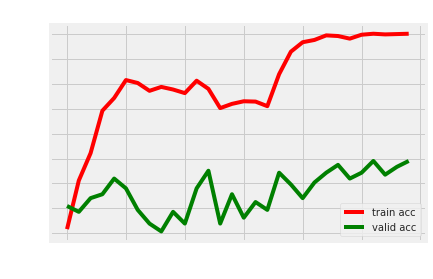

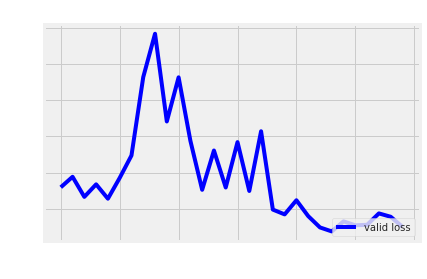

In [ ]:
plt.title('Accuracy',color='white')
plt.plot(train_acc, 'r', label='train acc')
plt.plot(valid_acc, 'g', label='valid acc')
plt.xlabel('Epochs',color='white')
plt.ylabel('Acc',color='white')
plt.legend(loc='lower right')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

plt.title('Loss',color='white')
plt.plot(loss_list,'b',label='valid loss')
plt.xlabel('Epochs',color='white')
plt.ylabel('Acc',color='white')
plt.legend()
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


#### (2) ResNet18 Pretrained Weight Decay / Valid Acc

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)


exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, mode='max',
                                                  factor=0.1, patience=3, threshold=0.01, 
                                                  threshold_mode='rel', cooldown=0, min_lr=1e-08, 
                                                  eps=1e-08, verbose=False)
model_ft,train_acc,valid_acc,loss_list = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=30)

Epoch 1/30
----------
train Loss: 0.70857 Acc: 0.56340
valid Loss: 0.61219 Acc: 0.64314
last learning rate:[0.001]

Epoch 2/30
----------
train Loss: 0.58079 Acc: 0.69869
valid Loss: 0.59498 Acc: 0.67843
last learning rate:[0.001]

Epoch 3/30
----------
train Loss: 0.50428 Acc: 0.74248
valid Loss: 0.64903 Acc: 0.63922
last learning rate:[0.001]

Epoch 4/30
----------
train Loss: 0.37265 Acc: 0.84118
valid Loss: 0.64749 Acc: 0.67843
last learning rate:[0.001]

Epoch 5/30
----------
train Loss: 0.31311 Acc: 0.86993
valid Loss: 0.65528 Acc: 0.69412
last learning rate:[0.001]

Epoch 6/30
----------
train Loss: 0.25782 Acc: 0.90458
valid Loss: 1.66404 Acc: 0.54118
last learning rate:[0.001]

Epoch 7/30
----------
train Loss: 0.22216 Acc: 0.92484
valid Loss: 0.66196 Acc: 0.71765
last learning rate:[0.001]

Epoch 8/30
----------
train Loss: 0.18952 Acc: 0.92941
valid Loss: 0.70150 Acc: 0.70980
last learning rate:[0.001]

Epoch 9/30
----------
train Loss: 0.26673 Acc: 0.88431
valid Loss: 0.813

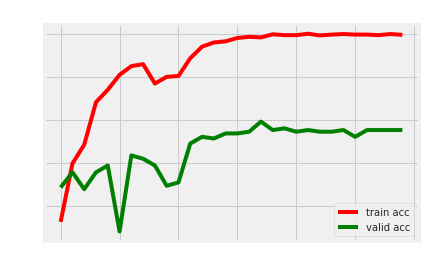

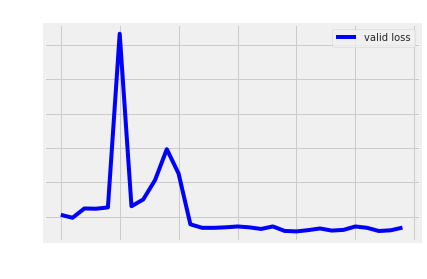

In [ ]:
plt.title('Accuracy',color='white')
plt.plot(train_acc, 'r', label='train acc')
plt.plot(valid_acc, 'g', label='valid acc')
plt.xlabel('Epochs',color='white')
plt.ylabel('Acc',color='white')
plt.legend(loc='lower right')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

plt.title('Loss',color='white')
plt.plot(loss_list,'b',label='valid loss')
plt.xlabel('Epochs',color='white')
plt.ylabel('Acc',color='white')
plt.legend()
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


#### 모델저장

In [ ]:
PATH='/gdrive/My Drive/Colab Notebooks/RAF/5crop_res18_WD_valacc.pt'

In [ ]:
torch.save({
            'model_state_dict': model_ft.state_dict(),
            'optimizer_state_dict': optimizer_ft.state_dict(),
             }, PATH)

#### (3) ResNet18 Pretrained Weight Decay / Valid Acc / Dropout 0.5

In [ ]:
import torchvision.models as models
from collections import OrderedDict
model_ft = models.resnet18(pretrained=True)
#num_ftrs = model_ft.fc.in_features
#model_ft.fc = nn.Linear(num_ftrs, 2)
#model_ft


model_ft.fc = torch.nn.Sequential(OrderedDict([
            ('Linear',torch.nn.Linear(512, 2, bias=True)),
            ('Dropout1',torch.nn.Dropout(0.5,inplace=False))
            ])
              )
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)

In [ ]:
exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, mode='min',
                                                  factor=0.1, patience=5, threshold=0.01, 
                                                  threshold_mode='rel', cooldown=0, min_lr=1e-6, 
                                                  eps=1e-06, verbose=False)
model_ft,train_acc,valid_acc,loss_list = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=30)

Epoch 1/30
----------
train Loss: 0.67490 Acc: 0.60196
valid Loss: 0.63770 Acc: 0.64706
last learning rate:[0.001]

Epoch 2/30
----------
train Loss: 0.58016 Acc: 0.70588
valid Loss: 0.57225 Acc: 0.69412
last learning rate:[0.001]

Epoch 3/30
----------
train Loss: 0.49810 Acc: 0.76601
valid Loss: 0.70784 Acc: 0.64314
last learning rate:[0.001]

Epoch 4/30
----------
train Loss: 0.40127 Acc: 0.82157
valid Loss: 0.64515 Acc: 0.69412
last learning rate:[0.001]

Epoch 5/30
----------
train Loss: 0.33739 Acc: 0.87124
valid Loss: 0.63209 Acc: 0.69804
last learning rate:[0.001]

Epoch 6/30
----------
train Loss: 0.32767 Acc: 0.86340
valid Loss: 0.62300 Acc: 0.72941
last learning rate:[0.001]

Epoch 7/30
----------
train Loss: 0.27593 Acc: 0.90458
valid Loss: 0.84986 Acc: 0.67059
last learning rate:[0.0001]

Epoch 8/30
----------
train Loss: 0.17486 Acc: 0.94510
valid Loss: 0.55534 Acc: 0.73725
last learning rate:[0.0001]

Epoch 9/30
----------
train Loss: 0.15087 Acc: 0.96078
valid Loss: 0.5

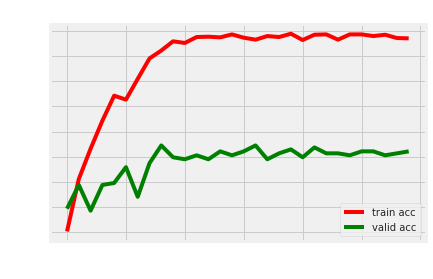

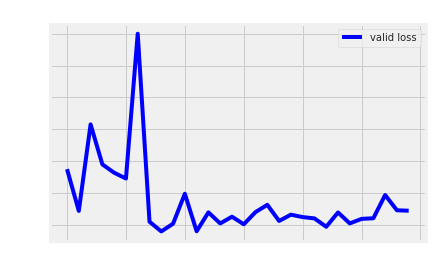

In [ ]:
plt.title('Accuracy',color='white')
plt.plot(train_acc, 'r', label='train acc')
plt.plot(valid_acc, 'g', label='valid acc')
plt.xlabel('Epochs',color='white')
plt.ylabel('Acc',color='white')
plt.legend(loc='lower right')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

plt.title('Loss',color='white')
plt.plot(loss_list,'b',label='valid loss')
plt.xlabel('Epochs',color='white')
plt.ylabel('Acc',color='white')
plt.legend()
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


#### (4) ResNet18 Pretrained Weight Decay / Valid Acc / Dropout 0.65

In [ ]:
import torchvision.models as models
from collections import OrderedDict
model_ft = models.resnet18(pretrained=True)
#num_ftrs = model_ft.fc.in_features
#model_ft.fc = nn.Linear(num_ftrs, 2)
#model_ft


model_ft.fc = torch.nn.Sequential(OrderedDict([
            ('Linear',torch.nn.Linear(512, 2, bias=True)),
            ('Dropout1',torch.nn.Dropout(0.65,inplace=False))
            ])
              )
model_ft

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)

In [ ]:
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, mode='max',
                                                  factor=0.1, patience=5, threshold=0.01, 
                                                  threshold_mode='rel', cooldown=0, min_lr=1e-9, 
                                                  eps=1e-09, verbose=False)
model_ft,train_acc,valid_acc,loss_list = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=30)

Epoch 1/30
----------
train Loss: 0.68686 Acc: 0.60458
valid Loss: 0.59724 Acc: 0.70588
last learning rate:[0.001]

Epoch 2/30
----------
train Loss: 0.60939 Acc: 0.68366
valid Loss: 0.59081 Acc: 0.69804
last learning rate:[0.001]

Epoch 3/30
----------
train Loss: 0.51976 Acc: 0.75229
valid Loss: 0.58668 Acc: 0.70588
last learning rate:[0.001]

Epoch 4/30
----------
train Loss: 0.46354 Acc: 0.78889
valid Loss: 0.58344 Acc: 0.69412
last learning rate:[0.001]

Epoch 5/30
----------
train Loss: 0.36676 Acc: 0.86209
valid Loss: 0.59647 Acc: 0.71765
last learning rate:[0.001]

Epoch 6/30
----------
train Loss: 0.34915 Acc: 0.85425
valid Loss: 0.59591 Acc: 0.71765
last learning rate:[0.001]

Epoch 7/30
----------
train Loss: 0.31931 Acc: 0.86993
valid Loss: 0.75474 Acc: 0.66667
last learning rate:[0.001]

Epoch 8/30
----------
train Loss: 0.37553 Acc: 0.83137
valid Loss: 0.67000 Acc: 0.67059
last learning rate:[0.001]

Epoch 9/30
----------
train Loss: 0.30844 Acc: 0.88235
valid Loss: 0.663

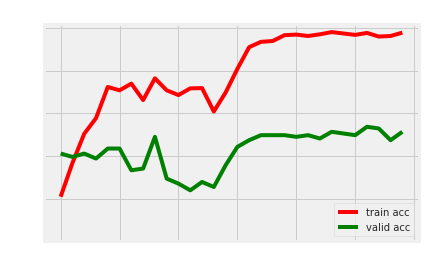

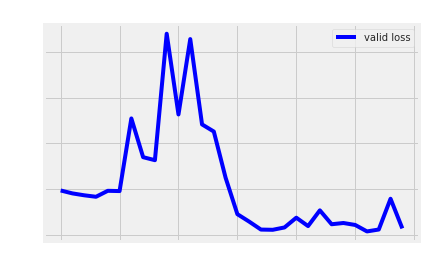

In [ ]:
plt.title('Accuracy',color='white')
plt.plot(train_acc, 'r', label='train acc')
plt.plot(valid_acc, 'g', label='valid acc')
plt.xlabel('Epochs',color='white')
plt.ylabel('Acc',color='white')
plt.legend(loc='lower right')
plt.xticks(color='white')
plt.yticks(np.arange(0.5,1.01,step=0.1),color='white')
plt.show()

plt.title('Loss',color='white')
plt.plot(loss_list,'b',label='valid loss')
plt.xlabel('Epochs',color='white')
plt.ylabel('Acc',color='white')
plt.legend()
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


#### (5) ResNet18 Pretrained Weight Decay / Valid Acc / Dropout 0.8

In [ ]:
import torchvision.models as models
from collections import OrderedDict
model_ft = models.resnet18(pretrained=True)
#num_ftrs = model_ft.fc.in_features
#model_ft.fc = nn.Linear(num_ftrs, 2)
#model_ft


model_ft.fc = torch.nn.Sequential(OrderedDict([
            ('Linear',torch.nn.Linear(512, 2, bias=True)),
            ('Dropout1',torch.nn.Dropout(0.8,inplace=False))
            ])
              )
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, weight_decay=0.1)

In [ ]:
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, mode='min',
                                                  factor=0.1, patience=5, threshold=0.01, 
                                                  threshold_mode='rel', cooldown=0, min_lr=1e-9, 
                                                  eps=1e-09, verbose=False)
model_ft,train_acc,valid_acc,loss_list = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=30)

Epoch 1/30
----------
train Loss: 0.79250 Acc: 0.54771
valid Loss: 0.63320 Acc: 0.63922
last learning rate:[0.001]

Epoch 2/30
----------
train Loss: 0.63232 Acc: 0.65163
valid Loss: 0.60338 Acc: 0.67451
last learning rate:[0.001]

Epoch 3/30
----------
train Loss: 0.58386 Acc: 0.69412
valid Loss: 0.57369 Acc: 0.69804
last learning rate:[0.001]

Epoch 4/30
----------
train Loss: 0.54071 Acc: 0.72614
valid Loss: 0.59242 Acc: 0.68627
last learning rate:[0.001]

Epoch 5/30
----------
train Loss: 0.49035 Acc: 0.76471
valid Loss: 0.63405 Acc: 0.68235
last learning rate:[0.001]

Epoch 6/30
----------
train Loss: 0.45840 Acc: 0.79542
valid Loss: 0.65601 Acc: 0.65490
last learning rate:[0.001]

Epoch 7/30
----------
train Loss: 0.42153 Acc: 0.80131
valid Loss: 0.66232 Acc: 0.66275
last learning rate:[0.0001]

Epoch 8/30
----------
train Loss: 0.34885 Acc: 0.83725
valid Loss: 0.55393 Acc: 0.69020
last learning rate:[0.0001]

Epoch 9/30
----------
train Loss: 0.27963 Acc: 0.89020
valid Loss: 0.5

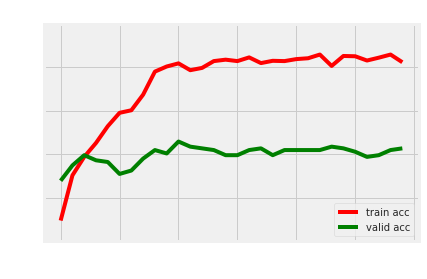

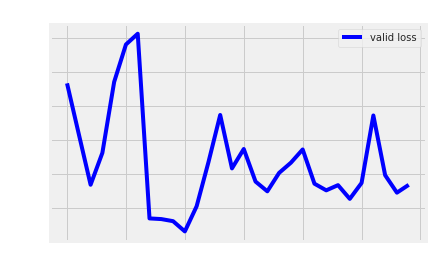

In [ ]:
plt.title('Accuracy',color='white')
plt.plot(train_acc, 'r', label='train acc')
plt.plot(valid_acc, 'g', label='valid acc')
plt.xlabel('Epochs',color='white')
plt.ylabel('Acc',color='white')
plt.legend(loc='lower right')
plt.xticks(color='white')
plt.yticks(np.arange(0.5,1.01,step=0.1),color='white')
plt.show()

plt.title('Loss',color='white')
plt.plot(loss_list,'b',label='valid loss')
plt.xlabel('Epochs',color='white')
plt.ylabel('Acc',color='white')
plt.legend()
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


# Test

## 모델 불러오기


In [ ]:
import torchvision.models as models
model_ft =  models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=1.0000000000000002e-07, momentum=0.9, weight_decay=0.1)

PATH='/gdrive/My Drive/Colab Notebooks/RAF/5crop_res18_WD_valacc.pt'

checkpoint = torch.load(PATH)
model_ft.load_state_dict(checkpoint['model_state_dict'])
optimizer_ft.load_state_dict(checkpoint['optimizer_state_dict'])
model_ft.train()

## 1) Normal

In [ ]:
import os,sys
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.Resize((256,256)),
        transforms.FiveCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ]),
    'valid': transforms.Compose([
        #transforms.RandomHorizontalFlip(),
        transforms.Resize((256,256)),
        transforms.TenCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ]),
    'test': transforms.Compose([
        #transforms.Resize((256,256)),
        #transforms.FiveCrop(224),
        #transforms.CenterCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        #transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        #transforms.Lambda(lambda tensors:
        #                  torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ])
}
PATH='/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/'
data_dir = PATH
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x]) for x in ['train', 'valid','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True) for x in ['train', 'valid','test']}
#dataloader를 사전식으로 저장해놓은거                                             
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
class_count=[image_datasets['train'],image_datasets['valid'],image_datasets['test']]
class_names = image_datasets['train'].classes
print(class_names)


['fake', 'real']


In [ ]:
model_ft.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloaders['test']:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Accuracy of the model on the test images: 66.796875 %


## 2) Five crop

In [ ]:
import os,sys
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.Resize((256,256)),
        transforms.FiveCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ]),
    'valid': transforms.Compose([
        #transforms.RandomHorizontalFlip(),
        transforms.Resize((256,256)),
        transforms.TenCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ]),
    'test': transforms.Compose([
        transforms.Resize((256,256)),
        transforms.FiveCrop(224),
        #transforms.CenterCrop(224),
        
        #transforms.RandomRotation((-45,45),expand=False),
        #transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
        transforms.Lambda(lambda tensors:
                          torch.stack([transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(t) for t in tensors]))
    ])
}
PATH='/gdrive/My Drive/Colab Notebooks/RAF/real_and_fake_face/'
data_dir = PATH
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x]) for x in ['train', 'valid','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True) for x in ['train', 'valid','test']}
#dataloader를 사전식으로 저장해놓은거                                             
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
class_count=[image_datasets['train'],image_datasets['valid'],image_datasets['test']]
class_names = image_datasets['train'].classes
print(class_names)


['fake', 'real']


In [ ]:
# Test the model
model_ft.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloaders['test']:
        images = images.to(device)
        labels = labels.to(device)
        bs, ncrops, c, h, w = images.size()

        outputs = model_ft(images.view(-1, c, h, w))
        outputs_avg= outputs.view(bs, ncrops, -1).mean(1)
        _, predicted = torch.max(outputs_avg.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))


Accuracy of the model on the test images: 72.265625 %


## 3) Ten crop

In [ ]:
# Test the model
model_ft.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloaders['test']:
        images = images.to(device)
        labels = labels.to(device)
        bs, ncrops, c, h, w = images.size()

        outputs = model_ft(images.view(-1, c, h, w))
        outputs_avg= outputs.view(bs, ncrops, -1).mean(1)
        _, predicted = torch.max(outputs_avg, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))


Accuracy of the model on the test images: 71.09375 %


# 이미지 입력 후 예측 결과 확인

torch.Size([224, 224, 3])
torch.Size([1, 3, 224, 224])


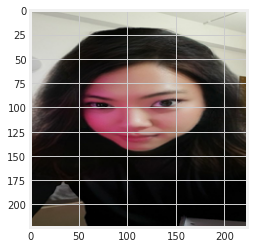

In [17]:
import PIL.Image as pilimg
import numpy as np

image = pilimg.open('/gdrive/MyDrive/Colab Notebooks/RAF/KakaoTalk_20201127_003830944.jpg')

image=image.resize((224,224))
#plt.imshow(image)
girldy = np.array(image)
plt.imshow(girldy)

girldy=torch.from_numpy(girldy).to(device,torch.float)
print(girldy.shape)
girldy=girldy.view(1,3,224,224)
print(girldy.shape)



In [18]:
import torchvision.models as models
model_ft =  models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=1.0000000000000002e-07, momentum=0.9, weight_decay=0.1)

PATH='/gdrive/My Drive/Colab Notebooks/RAF/5crop_res18_WD_valacc.pt'

checkpoint = torch.load(PATH)
model_ft.load_state_dict(checkpoint['model_state_dict'])
optimizer_ft.load_state_dict(checkpoint['optimizer_state_dict'])
model_ft.train()


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
outputs = model_ft(girldy)
_, predicted = torch.max(outputs.data, 1)
print(class_names[predicted])


real
